In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error,mean_absolute_error, mean_absolute_percentage_error
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import warnings
warnings.filterwarnings('ignore')
from statsmodels.tsa.stattools import adfuller

In [2]:
df=pd.read_csv('product k.csv', parse_dates=['Month-Year'], index_col='Month-Year')

In [3]:
sales_k= df.drop(['Product Name','Product Category','Month','Year','Market Size', 'Marketing Expense','Month No.'],axis=1)

In [4]:
sales_k.shape

(60, 1)

In [5]:
sales_k.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 60 entries, 2019-01-01 to 2023-12-01
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Sales   60 non-null     int64
dtypes: int64(1)
memory usage: 960.0 bytes


In [6]:
sales_k['Sales'].sum()

32299304

Text(0.5, 1.0, 'Product K')

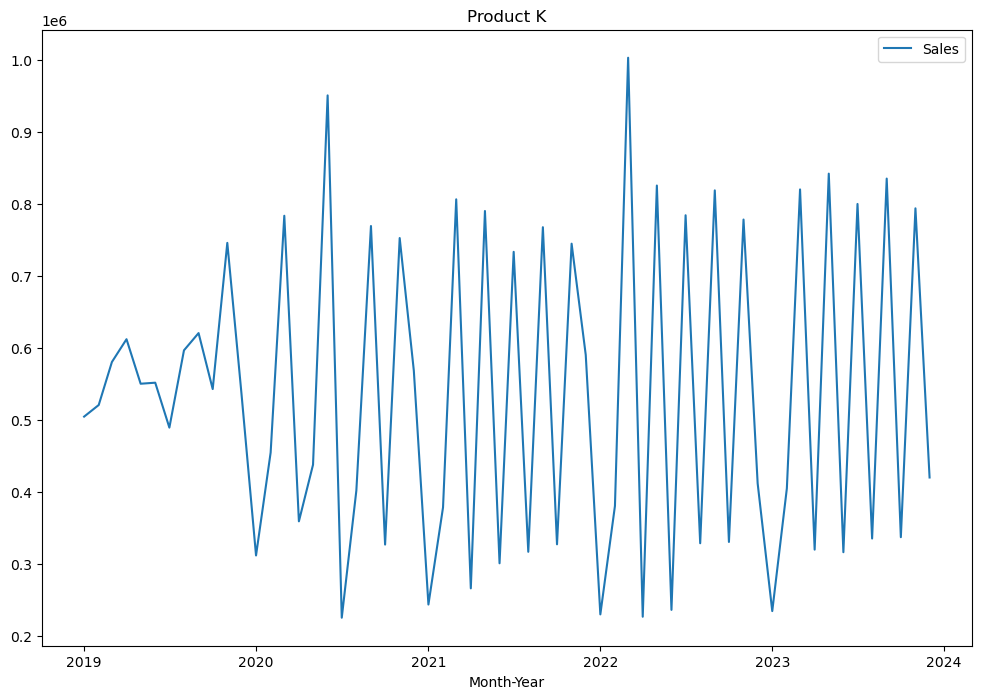

In [7]:
plt.figure(figsize=(12,8))
sns.lineplot(sales_k)
plt.title('Product K')

In [8]:
def adf_test(series):
    result=adfuller(series)
    print('ADF Statistics: {}'.format(result[0]))
    print('p- value: {}'.format(result[1]))
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

In [9]:
adf_test(sales_k)

ADF Statistics: -4.339743021722731
p- value: 0.0003788479952270515
strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary


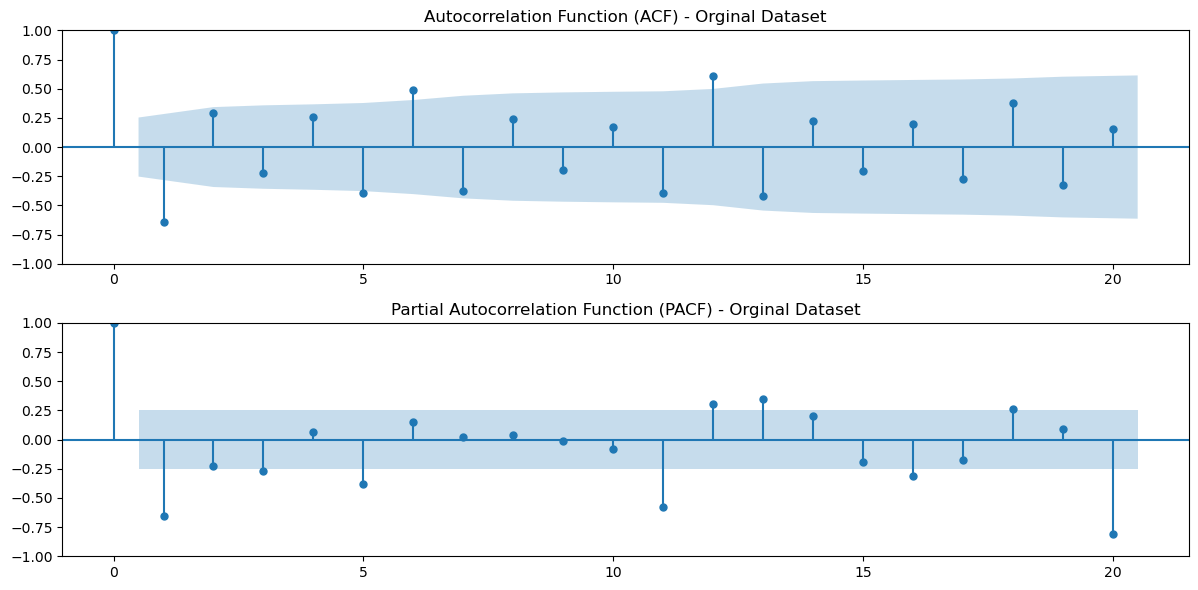

In [10]:
# Plot ACF and PACF
plt.figure(figsize=(12, 6))
plt.subplot(211)
plot_acf(sales_k, lags=20, ax=plt.gca())
plt.title('Autocorrelation Function (ACF) - Orginal Dataset')

plt.subplot(212)
plot_pacf(sales_k, lags=20, ax=plt.gca())
plt.title('Partial Autocorrelation Function (PACF) - Orginal Dataset')

plt.tight_layout()
plt.show()

In [11]:
train= sales_k[:54]
test=sales_k[54:]

In [12]:
len(train)

54

In [13]:
#the combination p=(0,1,2,3,4,5) d=0 q=(0,1,2,3,4) must be tested with accuracy metrics and aic

In [14]:
#param = [(0,0,0),(0,0,1),(0,0,2),(0,0,3),(0,0,4),(1,0,0),(1,0,1),(1,0,2),(1,0,3),(1,0,4),(2,0,0), (2,0,1), (2,0,2),(2,0,3),(2,0,4),(3,0,0),(3,0,1),(3,0,2),(3,0,3),(3,0,4),(4,0,0),(4,0,1),(4,0,2),(4,0,3),(4,0,4),(5,0,0),(5,0,1),(5,0,2),(5,0,3),(5,0,4)]

#for p in param:  # Changed 'x' to 'p'
#    model = ARIMA(train, order=p).fit()
#    pred = model.forecast(steps=len(test))
#    mae = mean_absolute_error(test, pred)
#    # Calculate MAPE manually
#    mape = np.mean(np.abs((test - pred) / test)) * 100
#    mse=mean_squared_error(test, pred)
#    rmse = np.sqrt(mean_squared_error(test, pred))
#    print(p)
#    print(f'MAE: {mae}')
#    print(f'MSE: {mse}')
#    print(f'RMSE: {rmse}')
#    print('A.I.C:', model.aic)

In [15]:
order=[]
for p in range(6):
    # Loop over MA order
    for q in range(4):
        # Fit model        
#       model= ARIMA(sales_i, order=(p,1,q))
        model_t = ARIMA(train['Sales'], order=(p,0,q))
        model_test=model_t.fit() 
        pred=model_test.predict(start=len(train), end=(len(sales_k)-1))
        mae = mean_absolute_error(test, pred)
        mape = np.mean(np.abs((test - pred) / test)) * 100
        mse=mean_squared_error(test, pred)
        rmse = np.sqrt(mean_squared_error(test, pred))
        # Add order and scores to list        
        order.append((p, q, model_test.aic, model_test.bic,mae, mse, rmse))
#Make DataFrame of model order and AIC/BIC scores
order_df = pd.DataFrame(order, columns=['p','q', 'aic', 'bic', 'mae','mse', 'rmse'])

In [16]:
# Sort by AIC
print(order_df.sort_values('aic'))

    p  q          aic          bic            mae           mse           rmse
23  5  3  1451.760470  1471.650311  114975.588271  1.742470e+10  132002.666291
6   1  2  1453.991400  1463.936320   94332.121615  1.161506e+10  107773.178869
20  5  0  1454.497266  1468.420154  115341.394726  1.727153e+10  131421.208862
21  5  1  1455.350074  1471.261947  125888.701692  2.165774e+10  147165.703312
10  2  2  1455.545503  1467.479407   93232.094604  1.131369e+10  106365.850639
7   1  3  1456.019948  1467.953852   93936.915024  1.151210e+10  107294.435066
15  3  3  1456.340397  1472.252269  125906.967005  1.973911e+10  140495.945379
1   0  1  1456.372463  1462.339415  211933.777374  4.845123e+10  220116.396994
5   1  1  1456.452963  1464.408900  206970.787634  4.639280e+10  215389.889714
14  3  2  1456.786953  1470.709841   95626.425481  1.174166e+10  108358.955909
18  4  2  1456.943630  1472.855502   90217.078415  1.003046e+10  100152.171396
22  5  2  1456.978135  1474.878991  116994.493990  1

In [17]:
m_arima= ARIMA (train, order=(5,0,3))
model_arima=m_arima.fit()
print(model_arima.summary())

                               SARIMAX Results                                
Dep. Variable:                  Sales   No. Observations:                   54
Model:                 ARIMA(5, 0, 3)   Log Likelihood                -715.880
Date:                Thu, 09 May 2024   AIC                           1451.760
Time:                        19:50:52   BIC                           1471.650
Sample:                    01-01-2019   HQIC                          1459.431
                         - 06-01-2023                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       5.329e+05    1.2e+04     44.266      0.000    5.09e+05    5.56e+05
ar.L1         -0.7751      0.259     -2.991      0.003      -1.283      -0.267
ar.L2         -0.6668      0.235     -2.832      0.0

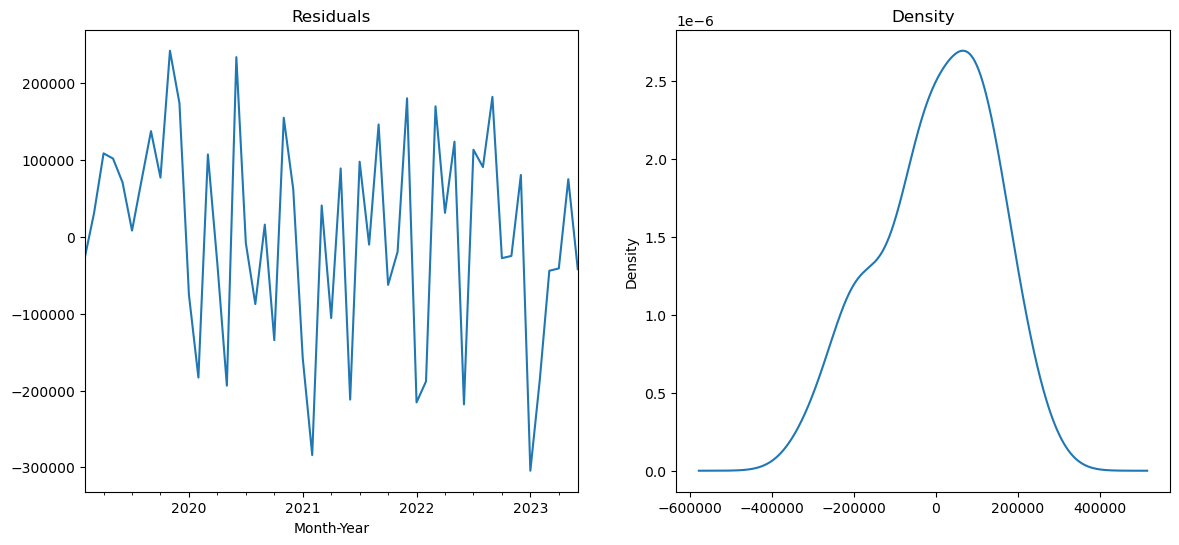

In [18]:
residuals= model_arima.resid[1:]
fig,ax=plt.subplots(1,2, figsize=(14, 6))
residuals.plot(title='Residuals',ax=ax[0])
residuals.plot(title='Density',kind='kde',ax=ax[1])
plt.show()

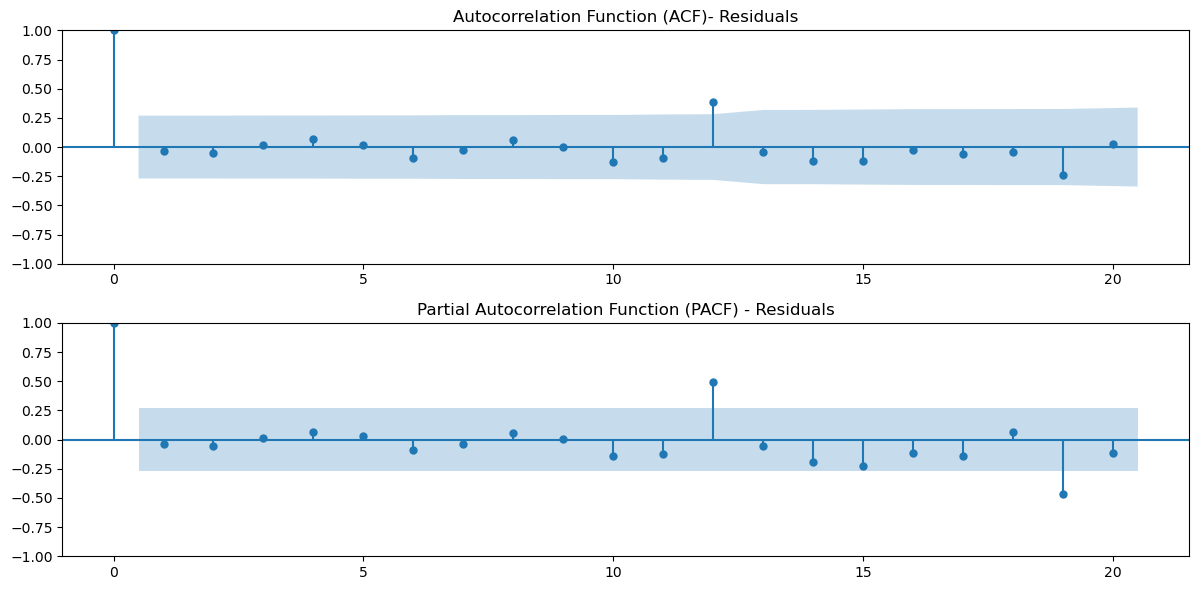

In [19]:
# Plot ACF and PACF
plt.figure(figsize=(12, 6))
plt.subplot(211)
plot_acf(residuals, lags=20, ax=plt.gca())
plt.title('Autocorrelation Function (ACF)- Residuals')

plt.subplot(212)
plot_pacf(residuals, lags=20, ax=plt.gca())
plt.title('Partial Autocorrelation Function (PACF) - Residuals')

plt.tight_layout()
plt.show()

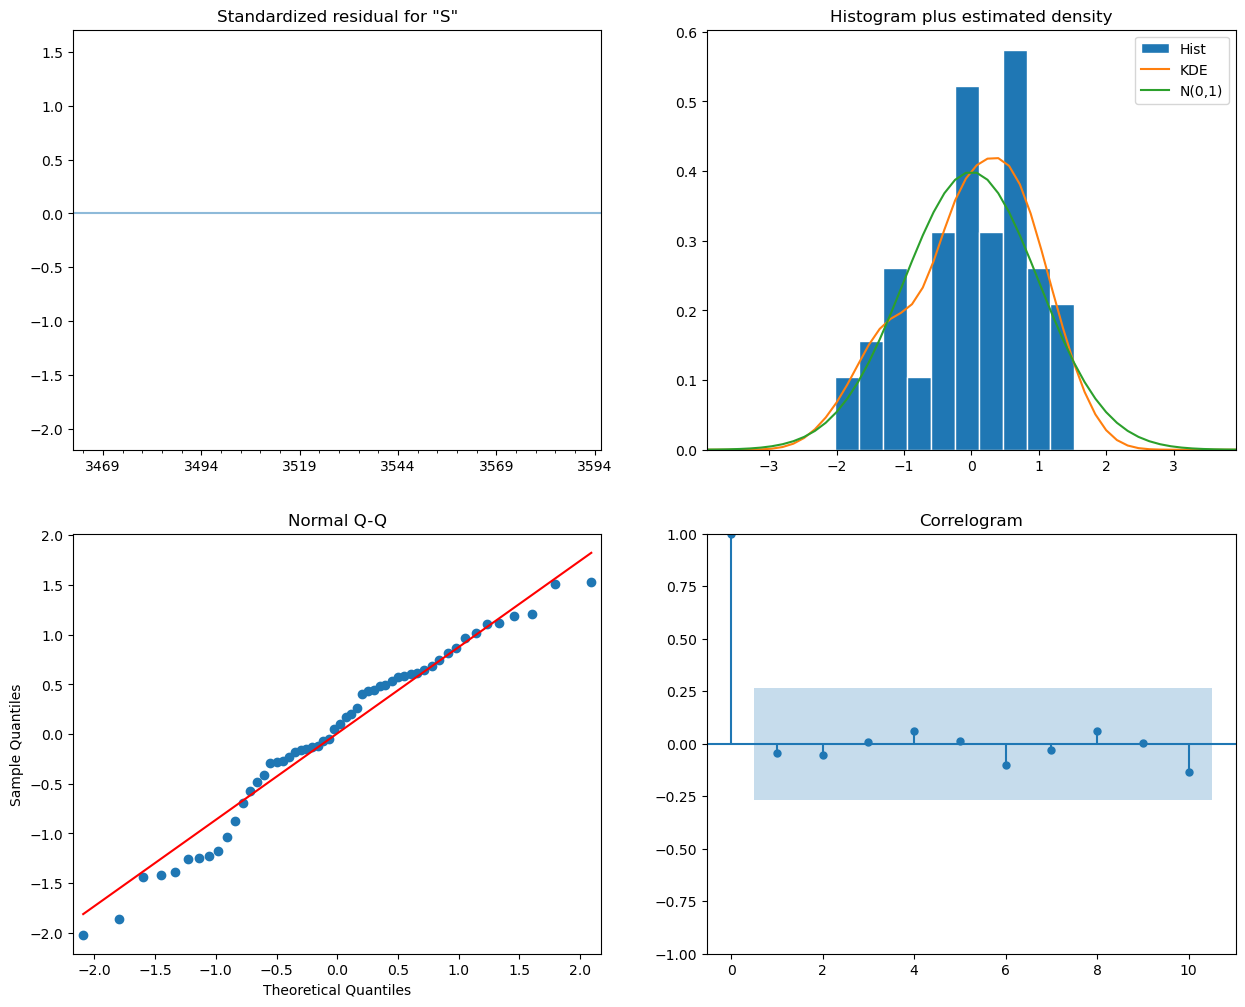

In [20]:
# Create the 4 diagostics plots
model_arima.plot_diagnostics(figsize=(15, 12))
plt.show()

In [21]:
#pred=model.forecast(steps= len(test))
#sales_k['Forecast_ARIMA']=[None]*len(train) + list(pred)
#sales_k.plot()

In [22]:
pred=model_arima.predict(start=len(train), end=(len(sales_k)-1), dynamic = True)
sales_k['Forecast_ARIMA']=[None]*len(train) + list(pred)

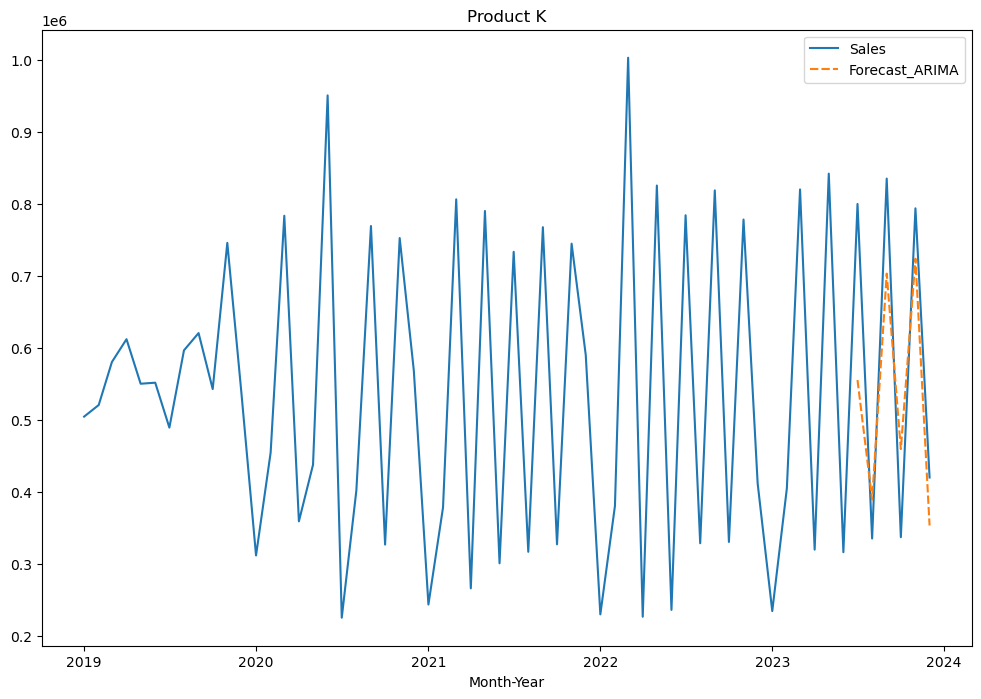

In [23]:
plt.figure(figsize=(12, 8))
sns.lineplot(sales_k)
plt.title('Product K')
plt.show()

In [24]:
mae_arima= mean_absolute_error(test,pred)
mse_arima=mean_squared_error(test, pred)
mape_arima= mean_absolute_percentage_error(test,pred)
rmse_arima= np.sqrt(mean_squared_error(test,pred))

print(f'MAE - ARIMA: {mae_arima}')
print(f'MAPE - ARIMA: {mape_arima}')
print(f'MSE - ARIMA: {mse_arima}')
print(f'RMSE - ARIMA: {rmse_arima}')

MAE - ARIMA: 114975.5882711478
MAPE - ARIMA: 0.20569337139823465
MSE - ARIMA: 17424703907.83789
RMSE - ARIMA: 132002.66629063935


# SARIMA

In [25]:
import statsmodels.api as sm

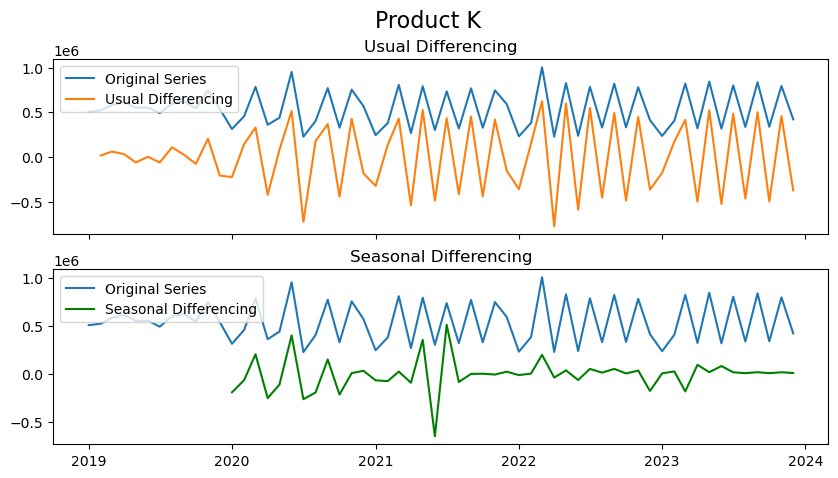

In [26]:
# Plot
fig, axes = plt.subplots(2, 1, figsize=(10,5), dpi=100, sharex=True)

# Usual Differencing
axes[0].plot(sales_k['Sales'], label='Original Series')
axes[0].plot(sales_k['Sales'].diff(1), label='Usual Differencing')
axes[0].set_title('Usual Differencing')
axes[0].legend(loc='upper left', fontsize=10)


# Seasinal Dei
axes[1].plot(sales_k['Sales'], label='Original Series')
axes[1].plot(sales_k['Sales'].diff(12), label='Seasonal Differencing', color='green')
axes[1].set_title('Seasonal Differencing')
plt.legend(loc='upper left', fontsize=10)
plt.suptitle('Product K', fontsize=16)
plt.show()

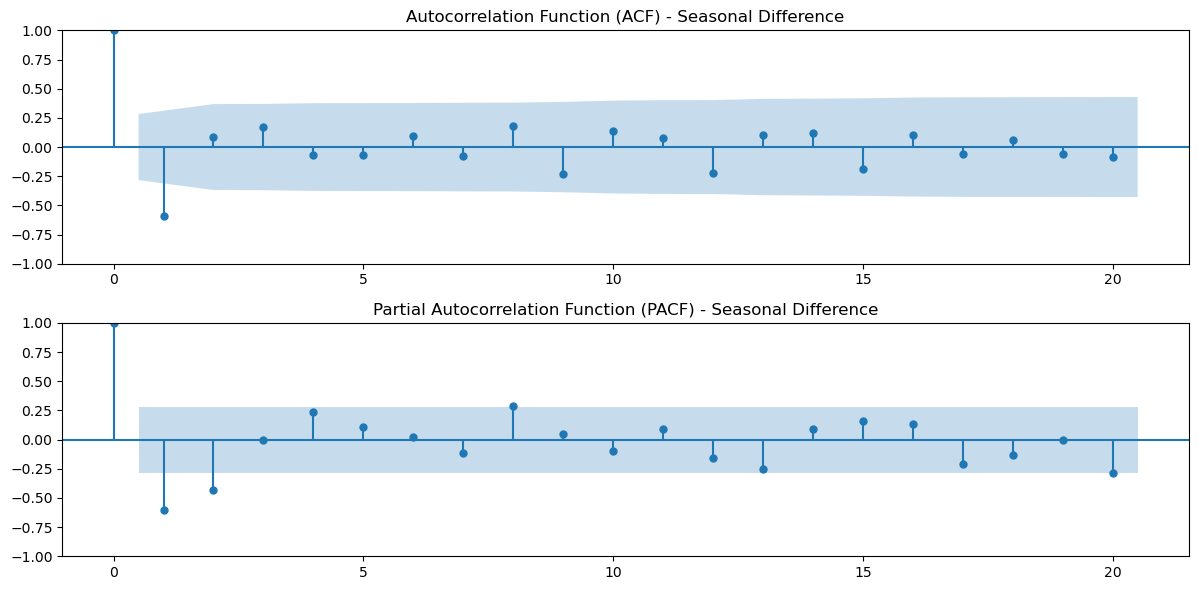

In [27]:
# Plot ACF and PACF
plt.figure(figsize=(12, 6))
plt.subplot(211)
plot_acf(sales_k['Sales'].diff(12).dropna(), lags=20, ax=plt.gca())
plt.title('Autocorrelation Function (ACF) - Seasonal Difference')

plt.subplot(212)
plot_pacf(sales_k['Sales'].diff(12).dropna(), lags=20, ax=plt.gca())
plt.title('Partial Autocorrelation Function (PACF) - Seasonal Difference')

plt.tight_layout()
plt.show()

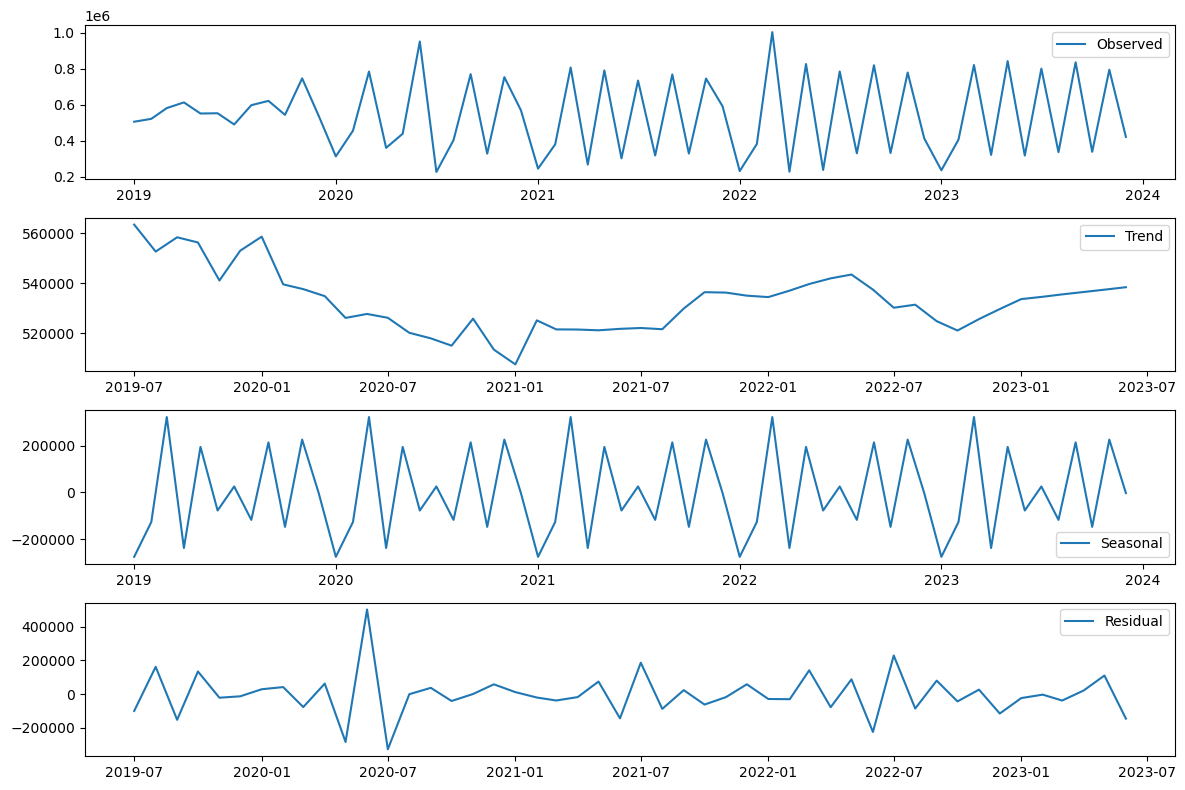

In [28]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Perform seasonal decomposition
decomposition = seasonal_decompose(sales_k['Sales'], model='additive', period=12)

# Plot the decomposition
#fig = decomposition.plot(figsize=(12,8))
#plt.show()
# Create a new figure with the specified size
plt.figure(figsize=(12, 8))

# Plot each component separately
plt.subplot(411)
plt.plot(decomposition.observed, label='Observed')
plt.legend()

plt.subplot(412)
plt.plot(decomposition.trend, label='Trend')
plt.legend()

plt.subplot(413)
plt.plot(decomposition.seasonal, label='Seasonal')
plt.legend()

plt.subplot(414)
plt.plot(decomposition.resid, label='Residual')
plt.legend()

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

In [29]:
order_SARIMAX=[]
# Loop over P order
for P in range(4):
    # Loop over Q order
    for Q in range(2):
        # Fit model
        model_s = sm.tsa.statespace.SARIMAX(train['Sales'], order=(5, 0, 3), seasonal_order=(P, 1, Q, 12))
        model_test_s = model_s.fit() 
        pred = model_test_s.predict(start=54, end=59, dynamic=True)
        mae = mean_absolute_error(test, pred)
        mse = mean_squared_error(test, pred)
        # Add order and scores to list        
        order_SARIMAX.append((P, Q, model_test_s.aic, model_test_s.bic, mae, mse))

# Make DataFrame of model order and scores
order_SARIMAX_df = pd.DataFrame(order_SARIMAX, columns=['P', 'Q', 'aic', 'bic', 'mae', 'mse'])

In [30]:
# Sort by AIC
print(order_SARIMAX_df.sort_values('aic'))

   P  Q          aic          bic           mae           mse
0  0  0  1122.850119  1138.489145  62633.659044  5.845789e+09
1  0  1  1123.676964  1141.053660  60081.128479  5.246882e+09
2  1  0  1123.700279  1141.076975  60726.691770  5.389259e+09
4  2  0  1124.465539  1143.579905  61287.971828  5.487607e+09
3  1  1  1127.946929  1147.061295  63983.818356  6.203551e+09
7  3  1  1129.788583  1152.378288  71939.428694  7.804097e+09
5  2  1  1131.082661  1151.934696  36346.034787  2.215813e+09
6  3  0  1195.802408  1216.654444  85016.021538  1.167705e+10


In [31]:
sarima=sm.tsa.statespace.SARIMAX(train['Sales'],order=(5, 0, 3),seasonal_order=(0,1,0,12))
sarima_model=sarima.fit()

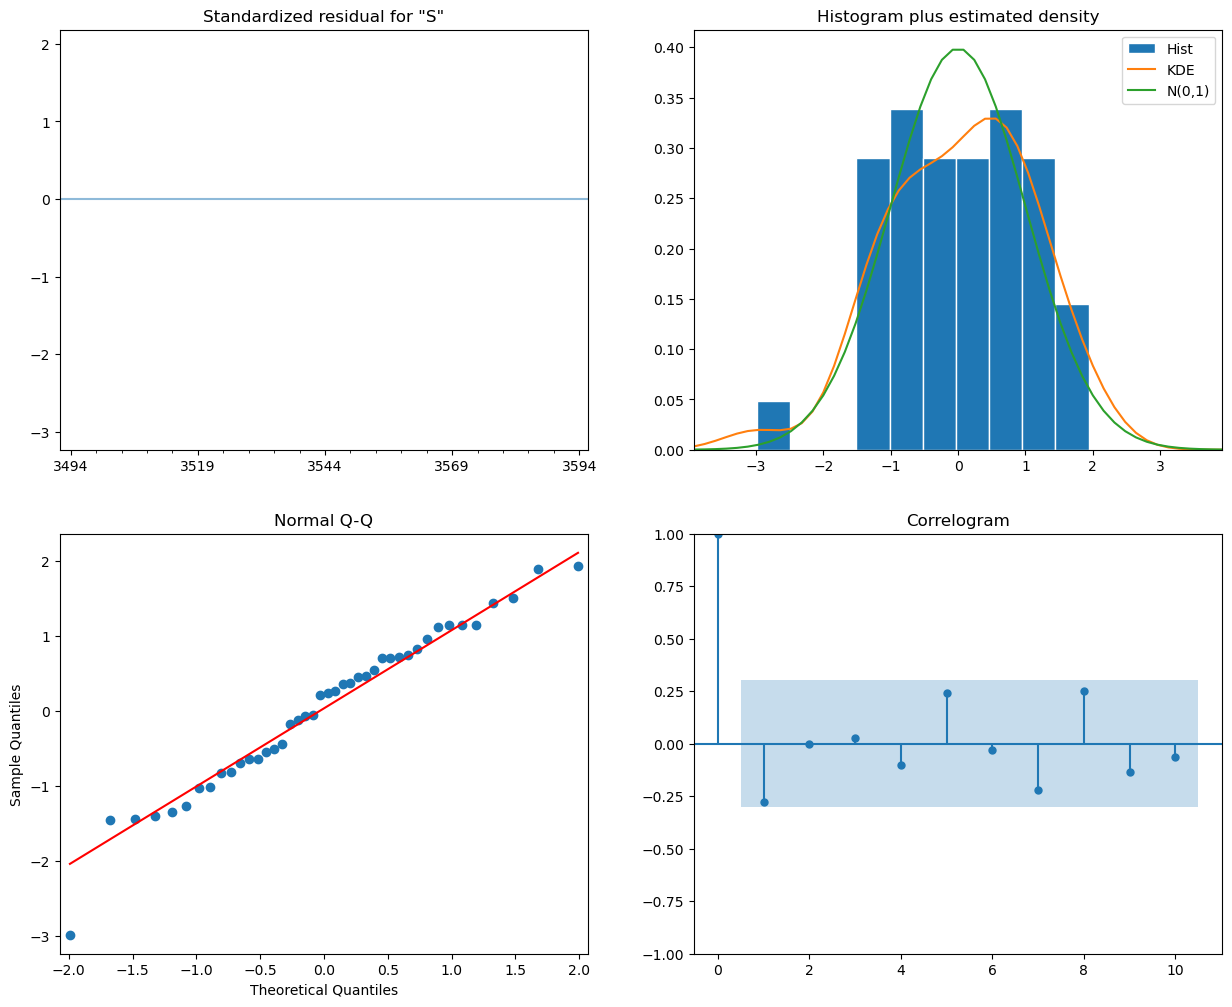

In [32]:
sarima_model.plot_diagnostics(figsize=(15, 12))
plt.show()

In [33]:
forecast_test_sarima=sarima_model.predict(start=54,end=59,dynamic=True)

In [34]:
sales_k['Forecast_SARIMA']=[None]*len(train)+ list(forecast_test_sarima)
#sales_b[['Sales','Forecast_SARIMA']].plot(figsize=(12,8))

Text(0.5, 1.0, 'Product K')

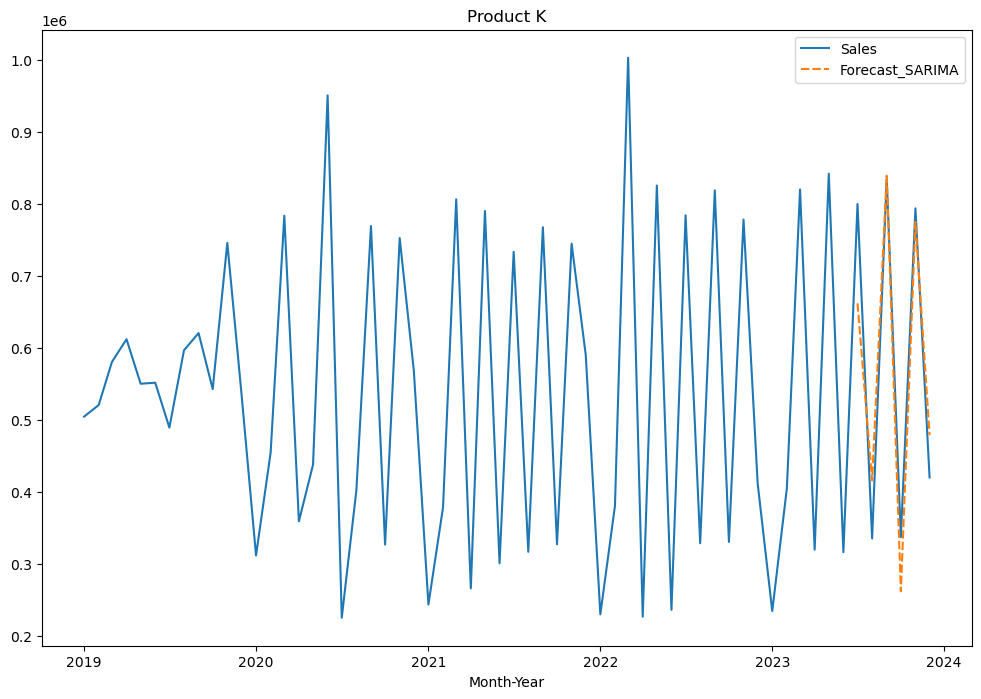

In [35]:
plt.figure(figsize=(12, 8))
sns.lineplot(sales_k[['Sales','Forecast_SARIMA']])
plt.title('Product K')

In [36]:
mae_sarima= mean_absolute_error(test,forecast_test_sarima)
mape_sarima= mean_absolute_percentage_error(test,forecast_test_sarima)
mse_sarima=mean_squared_error(test, forecast_test_sarima)
rmse_sarima= np.sqrt(mean_squared_error(test,forecast_test_sarima))

print(f'MAE - SARIMA: {round(mae_sarima,3)}')
print(f'MAPE - SARIMA: {round(mape_sarima,3)}')
print(f'MSE - SARIMA: {round(mse_sarima,3)}')
print(f'RMSE - SARIMA: {round(rmse_sarima,3)}')

MAE - SARIMA: 62633.659
MAPE - SARIMA: 0.134
MSE - SARIMA: 5845788527.287
RMSE - SARIMA: 76457.756


# AUTO-ARIMA

In [37]:
import pmdarima as pm

In [38]:
auto_arima= pm.auto_arima(train, start_p=0, d=0, start_q=0, max_p=6,max_q=3,
                          start_P=0, D=1, start_Q=0, max_P=4 ,max_Q=2 ,  
                          stepwise=False, trace=True,
                          seasonal=True,m=12)
auto_arima

 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=1142.549, Time=0.04 sec
 ARIMA(0,0,0)(0,1,1)[12] intercept   : AIC=1143.082, Time=0.09 sec
 ARIMA(0,0,0)(0,1,2)[12] intercept   : AIC=1145.060, Time=0.24 sec
 ARIMA(0,0,0)(1,1,0)[12] intercept   : AIC=1143.096, Time=0.08 sec
 ARIMA(0,0,0)(1,1,1)[12] intercept   : AIC=1145.080, Time=0.50 sec
 ARIMA(0,0,0)(1,1,2)[12] intercept   : AIC=inf, Time=0.86 sec
 ARIMA(0,0,0)(2,1,0)[12] intercept   : AIC=1144.967, Time=0.18 sec
 ARIMA(0,0,0)(2,1,1)[12] intercept   : AIC=1146.804, Time=0.78 sec
 ARIMA(0,0,0)(2,1,2)[12] intercept   : AIC=inf, Time=1.33 sec
 ARIMA(0,0,0)(3,1,0)[12] intercept   : AIC=1146.925, Time=2.06 sec
 ARIMA(0,0,0)(3,1,1)[12] intercept   : AIC=inf, Time=8.61 sec
 ARIMA(0,0,0)(3,1,2)[12] intercept   : AIC=1150.652, Time=6.95 sec
 ARIMA(0,0,0)(4,1,0)[12] intercept   : AIC=1148.892, Time=1.35 sec
 ARIMA(0,0,0)(4,1,1)[12] intercept   : AIC=inf, Time=6.39 sec
 ARIMA(0,0,1)(0,1,0)[12] intercept   : AIC=1132.962, Time=0.08 sec
 ARIMA(0,0,1)(0

ARIMA(order=(0, 0, 2), scoring_args={}, seasonal_order=(1, 1, 0, 12),
      suppress_warnings=True)

In [39]:
auto_arima.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                                   y   No. Observations:                   54
Model:             SARIMAX(0, 0, 2)x(1, 1, [], 12)   Log Likelihood                -556.569
Date:                             Thu, 09 May 2024   AIC                           1123.139
Time:                                     19:55:05   BIC                           1131.827
Sample:                                 01-01-2019   HQIC                          1126.323
                                      - 06-01-2023                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept  -1.483e+04   1.47e+04     -1.006      0.314   -4.37e+04    1.41e+04
ma.L1         -0.6710      0.080     -8.353      0.000      -0.828      -0.514
ma.L2          0.2983      0.065      4.594      0.000       0.171       0.426
ar.S.L12      -0.0754      0.041     -1.861      0.063      -0.155       0.004
sigma2       1.57e+10      0.019   8.23e+11      0.000    1.57e+10    1.57e+10
===================================================================================
Ljung-Box (L1) (Q):                   3.81   Jarque-Bera (JB):                 3.04
Prob(Q):                              0.05   Prob(JB):                         0.22
Heteroskedasticity (H):               0.32   Skew:                            -0.09
Prob(H) (two-sided):                  0.04   Kurtosis:                         4.31
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 2.19e+27. Standard errors may be unstable.
"""

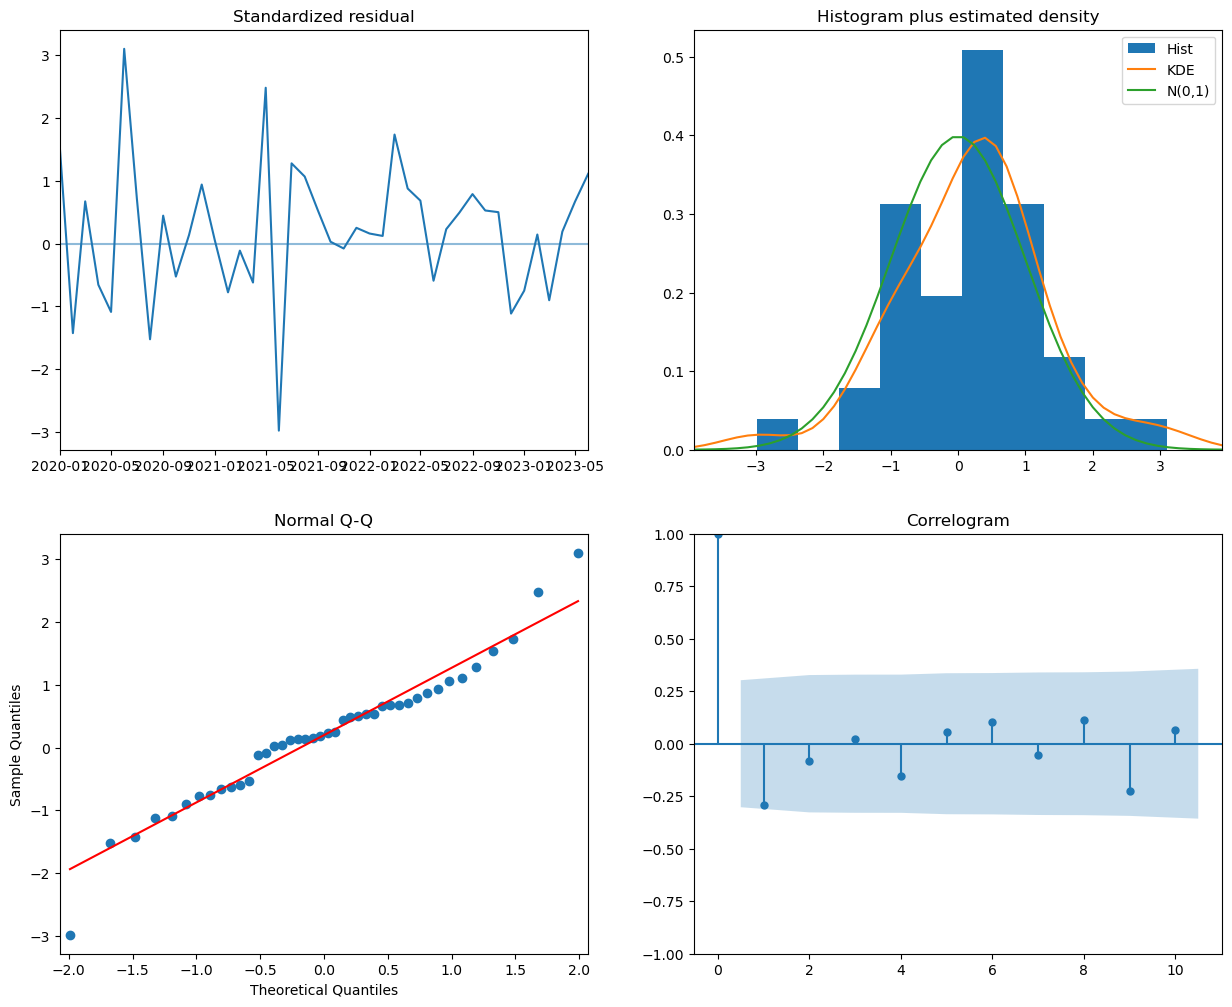

In [40]:
auto_arima.plot_diagnostics(figsize=(15, 12))
plt.show()

In [41]:
forecast_test_auto= auto_arima.predict(n_periods=len(test))
sales_k['Forecast_AUTO ARIMA']=[None]*len(train)+ list(forecast_test_auto)
#sales_k.plot()

Text(0.5, 1.0, 'Product K')

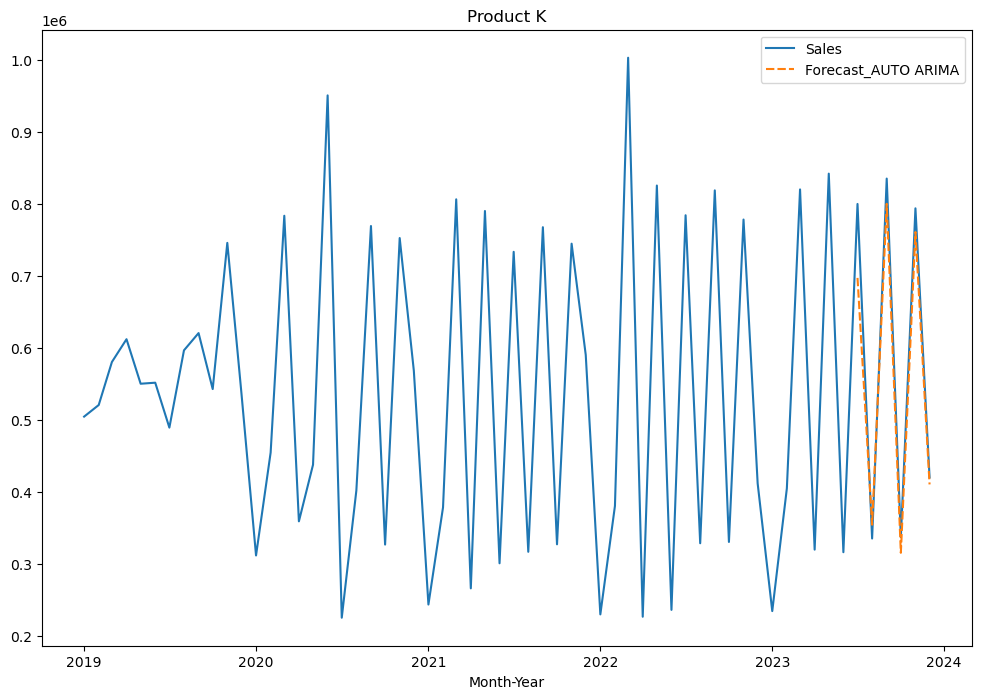

In [42]:
plt.figure(figsize=(12, 8))
sns.lineplot(sales_k[['Sales','Forecast_AUTO ARIMA']])
plt.title('Product K')

In [43]:
mae_auto_arima= mean_absolute_error(test,forecast_test_auto)
mape_auto_arima= mean_absolute_percentage_error(test,forecast_test_auto)
mse_auto_arima=mean_squared_error(test,forecast_test_auto)
rmse_auto_arima= np.sqrt(mean_squared_error(test,forecast_test_auto))

print(f'MAE - AUTO ARIMA: {mae_auto_arima}')
print(f'MAPE - AUTO ARIMA: {mape_auto_arima}')
print(f'MSE - AUTO ARIMA: {mse_auto_arima}')
print(f'RMSE - AUTO ARIMA: {rmse_auto_arima}')

MAE - AUTO ARIMA: 36875.9780182428
MAPE - AUTO ARIMA: 0.059358074972561126
MSE - AUTO ARIMA: 2300346287.1134825
RMSE - AUTO ARIMA: 47961.925389974516


In [44]:
sales_k.tail(12)

,Sales,Forecast_ARIMA,Forecast_SARIMA,Forecast_AUTO ARIMA
Month-Year,,,,
2023-01-01,234804,NaN,NaN,NaN
2023-02-01,405296,NaN,NaN,NaN
2023-03-01,820679,NaN,NaN,NaN
2023-04-01,320174,NaN,NaN,NaN
2023-05-01,842609,NaN,NaN,NaN
2023-06-01,316593,NaN,NaN,NaN
2023-07-01,800485,555837.610686,662405.667676,697743.472691
2023-08-01,335618,389688.571495,416416.850117,354833.993195
2023-09-01,835745,703654.118215,839649.395349,800676.484262


In [45]:
sales_k.mean()

Sales                  538321.733333
Forecast_ARIMA         531207.847735
Forecast_SARIMA        572549.043366
Forecast_AUTO ARIMA    556885.853047
dtype: float64

In [46]:
data = {
    'model': ['ARIMA', 'AUTO ARIMA', 'SEASONAL ARIMA'],
    'MAE': [mae_arima, mae_auto_arima, mae_sarima],  
    'MAPE': [mape_arima, mape_auto_arima, mape_sarima],  
    'MSE': [mse_arima, mse_auto_arima, mse_sarima],  
    'RMSE': [rmse_arima, rmse_auto_arima, rmse_sarima]  
}

model_results = pd.DataFrame(data)
model_results.set_index('model', inplace=True)
model_results

,MAE,MAPE,MSE,RMSE
model,,,,
ARIMA,114975.588271,0.205693,1.742470e+10,132002.666291
AUTO ARIMA,36875.978018,0.059358,2.300346e+09,47961.925390
SEASONAL ARIMA,62633.659044,0.134070,5.845789e+09,76457.756489


# TESTING

In [14]:
auto_arima_1= pm.auto_arima(train, start_p=0, start_q=0, max_p=5,max_q=3,
                          start_P=0, start_Q=0, max_P=2 ,max_Q=2 ,  
                          stepwise=False, trace=True,
                          seasonal=True,m=12)
auto_arima_1

 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=1142.549, Time=0.03 sec
 ARIMA(0,0,0)(0,1,1)[12] intercept   : AIC=1143.082, Time=0.06 sec
 ARIMA(0,0,0)(0,1,2)[12] intercept   : AIC=1145.060, Time=0.25 sec
 ARIMA(0,0,0)(1,1,0)[12] intercept   : AIC=1143.096, Time=0.08 sec
 ARIMA(0,0,0)(1,1,1)[12] intercept   : AIC=1145.080, Time=0.48 sec
 ARIMA(0,0,0)(1,1,2)[12] intercept   : AIC=inf, Time=0.91 sec
 ARIMA(0,0,0)(2,1,0)[12] intercept   : AIC=1144.967, Time=0.23 sec
 ARIMA(0,0,0)(2,1,1)[12] intercept   : AIC=1146.804, Time=1.28 sec
 ARIMA(0,0,0)(2,1,2)[12] intercept   : AIC=inf, Time=1.54 sec
 ARIMA(0,0,1)(0,1,0)[12] intercept   : AIC=1132.962, Time=0.09 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=1134.951, Time=0.23 sec
 ARIMA(0,0,1)(0,1,2)[12] intercept   : AIC=1136.266, Time=0.92 sec
 ARIMA(0,0,1)(1,1,0)[12] intercept   : AIC=1134.859, Time=0.33 sec
 ARIMA(0,0,1)(1,1,1)[12] intercept   : AIC=inf, Time=1.04 sec
 ARIMA(0,0,1)(1,1,2)[12] intercept   : AIC=inf, Time=1.58 sec
 ARIMA(0,0,1)(2

ARIMA(order=(0, 0, 2), scoring_args={}, seasonal_order=(1, 1, 0, 12),
      suppress_warnings=True)

In [15]:
auto_arima_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                                   y   No. Observations:                   54
Model:             SARIMAX(0, 0, 2)x(1, 1, [], 12)   Log Likelihood                -556.569
Date:                             Wed, 08 May 2024   AIC                           1123.139
Time:                                     20:29:53   BIC                           1131.827
Sample:                                 01-01-2019   HQIC                          1126.323
                                      - 06-01-2023                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept  -1.483e+04   1.47e+04     -1.006      0.314   -4.37e+04    1.41e+04
ma.L1         -0.6710      0.080     -8.353      0.000      -0.828      -0.514
ma.L2          0.2983      0.065      4.594      0.000       0.171       0.426
ar.S.L12      -0.0754      0.041     -1.861      0.063      -0.155       0.004
sigma2       1.57e+10      0.019   8.23e+11      0.000    1.57e+10    1.57e+10
===================================================================================
Ljung-Box (L1) (Q):                   3.81   Jarque-Bera (JB):                 3.04
Prob(Q):                              0.05   Prob(JB):                         0.22
Heteroskedasticity (H):               0.32   Skew:                            -0.09
Prob(H) (two-sided):                  0.04   Kurtosis:                         4.31
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 2.19e+27. Standard errors may be unstable.
"""

In [16]:
forecast_test_auto_1= auto_arima_1.predict(n_periods=len(test))
sales_k['Forecast_AUTO ARIMA_1']=[None]*len(train)+ list(forecast_test_auto_1)

Text(0.5, 1.0, 'Product K')

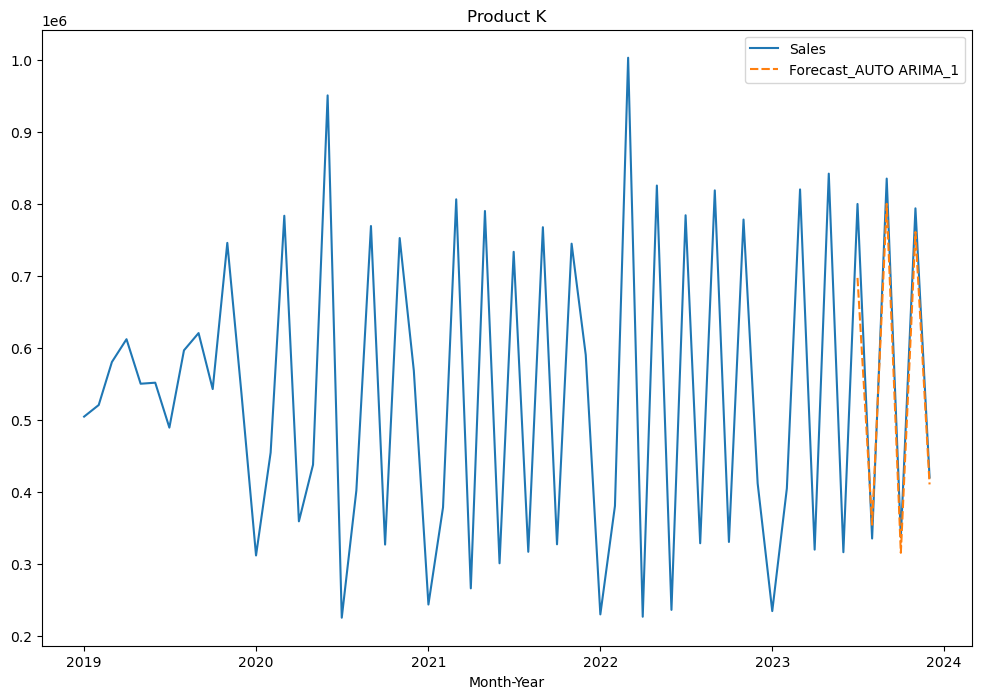

In [17]:
plt.figure(figsize=(12, 8))
sns.lineplot(sales_k[['Sales','Forecast_AUTO ARIMA_1']])
plt.title('Product K')

In [18]:
mae_auto_arima_1= mean_absolute_error(test,forecast_test_auto_1)
mape_auto_arima_1= mean_absolute_percentage_error(test,forecast_test_auto_1)
mse_auto_arima_1=mean_squared_error(test,forecast_test_auto_1)
rmse_auto_arima_1= np.sqrt(mean_squared_error(test,forecast_test_auto_1))

print(f'MAE - AUTO ARIMA: {mae_auto_arima_1}')
print(f'MAPE - AUTO ARIMA: {mape_auto_arima_1}')
print(f'MSE - AUTO ARIMA: {mse_auto_arima_1}')
print(f'RMSE - AUTO ARIMA: {rmse_auto_arima_1}')

MAE - AUTO ARIMA: 36875.9780182428
MAPE - AUTO ARIMA: 0.059358074972561126
MSE - AUTO ARIMA: 2300346287.1134825
RMSE - AUTO ARIMA: 47961.925389974516
